Data Position Salary:
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

Data 50 Startups:
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

Data Salary Data:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0



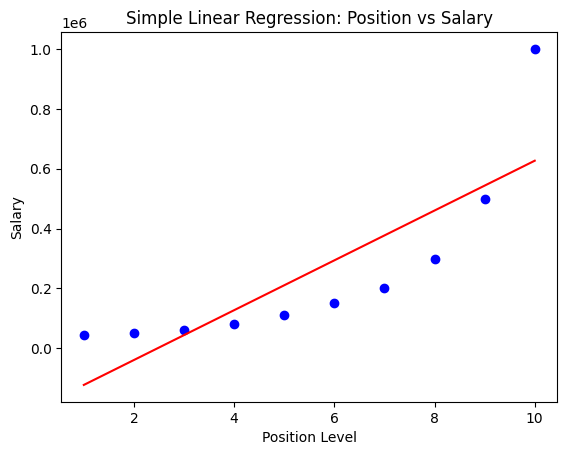

Multiple Linear Regression:
Coefficients: [ 7.73467193e-01  3.28845975e-02  3.66100259e-02  8.66383692e+01
 -8.72645791e+02  7.86007422e+02]
Intercept: 42467.52924855314
R-squared: 0.9347068473282423



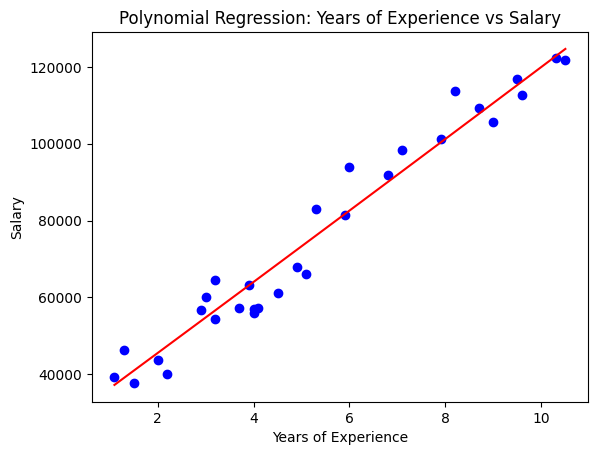

Polynomial Regression:
Coefficients: [   0.         9205.97080896    9.47566012]
Intercept: 27013.670321992715
R-squared: 0.9882197351491804


In [11]:
# Tugas Regression Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Langkah 1: Persiapan Data

# Mengimpor dataset Position Salary
position_salary_data = pd.read_csv('/content/sample_data/Position_Salaries.csv')

# Menampilkan beberapa baris pertama data
print("Data Position Salary:")
print(position_salary_data.head())
print()

# Mengimpor dataset 50 Startups
startups_data = pd.read_csv('/content/sample_data/50_Startups.csv')

# Menampilkan beberapa baris pertama data
print("Data 50 Startups:")
print(startups_data.head())
print()

# Mengimpor dataset Salary Data
salary_data = pd.read_csv('/content/sample_data/Salary_Data.csv')

# Menampilkan beberapa baris pertama data
print("Data Salary Data:")
print(salary_data.head())
print()

# Langkah 2: Simple Linear Regression

# Menggunakan kolom 'Level' sebagai fitur (X) dan 'Salary' sebagai target (y)
X_simple = position_salary_data[['Level']].values
y_simple = position_salary_data['Salary'].values

# Membagi data menjadi train dan test set
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=0)

# Membuat model regresi linear sederhana
reg_simple = LinearRegression()
reg_simple.fit(X_train_simple, y_train_simple)

# Prediksi hasil untuk test set
y_pred_simple = reg_simple.predict(X_test_simple)

# Visualisasi hasil regresi sederhana
plt.scatter(X_simple, y_simple, color='blue')
plt.plot(X_simple, reg_simple.predict(X_simple), color='red')
plt.title('Simple Linear Regression: Position vs Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Langkah 3: Multiple Linear Regression

# Menggunakan semua kolom kecuali 'Profit' sebagai fitur (X) dan 'Profit' sebagai target (y)
X_multiple = startups_data.drop(columns=['Profit']).values
y_multiple = startups_data['Profit'].values

# Melakukan one-hot encoding pada kolom 'State'
X_multiple = pd.get_dummies(startups_data.drop(columns=['Profit']))

# Membagi data menjadi train dan test set
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=0)

# Membuat model regresi linear multiple
reg_multiple = LinearRegression()
reg_multiple.fit(X_train_multiple, y_train_multiple)

# Prediksi hasil untuk test set
y_pred_multiple = reg_multiple.predict(X_test_multiple)

# Evaluasi model multiple linear regression
print("Multiple Linear Regression:")
print("Coefficients:", reg_multiple.coef_)
print("Intercept:", reg_multiple.intercept_)
print("R-squared:", r2_score(y_test_multiple, y_pred_multiple))
print()

# Langkah 4: Polynomial Regression

# Menggunakan kolom 'YearsExperience' sebagai fitur (X) dan 'Salary' sebagai target (y)
X_poly = salary_data[['YearsExperience']].values
y_poly = salary_data['Salary'].values

# Membagi data menjadi train dan test set
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=0)

# Mengubah fitur menjadi polinomial
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_poly)
X_test_poly = poly_features.transform(X_test_poly)

# Membuat model regresi polinomial
reg_poly = LinearRegression()
reg_poly.fit(X_train_poly, y_train_poly)

# Prediksi hasil untuk test set
y_pred_poly = reg_poly.predict(X_test_poly)

# Visualisasi hasil regresi polinomial
plt.scatter(X_poly, y_poly, color='blue')
plt.plot(X_poly, reg_poly.predict(poly_features.transform(X_poly)), color='red')
plt.title('Polynomial Regression: Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Evaluasi model regresi polinomial
print("Polynomial Regression:")
print("Coefficients:", reg_poly.coef_)
print("Intercept:", reg_poly.intercept_)
print("R-squared:", r2_score(y_test_poly, y_pred_poly))
